# Q2 Mini Project

## The following contains two models that have been implemented

# Model 1 Uses the following to predict the effect on CO with the following independent variables
#### 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)','NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'T', 'RH', 'AH'

### Model 2 Uses the following the predict which days are good for living with the following independent variables
#### 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH',', 'dayofweek','hour','month', 'day'

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import pandas as pd
dataset = pd.read_excel('AirQuality.xlsx')
intermediate = dataset.drop(['C6H6(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'],axis=1)


In [2]:
intermediate.columns


Index([u'Date', u'Time', u'CO(GT)', u'PT08.S1(CO)', u'NMHC(GT)',
       u'PT08.S2(NMHC)', u'NOx(GT)', u'PT08.S3(NOx)', u'NO2(GT)', u'T', u'RH',
       u'AH'],
      dtype='object')

In [3]:
data = intermediate

import datetime

dayofweek = []   
for i in range (0,len(data.iloc[:,0])):
    t = data.iloc[i,0]
    #print(t.day)
    thisdate = datetime.date(t.year,t.month,t.day)
    dayofweek.append(thisdate.weekday())

#Adding dayofweek to main dataframe
data['dayofweek'] = dayofweek

In [4]:
#data.head()
#separate hour of the day
hour = []
for i in range (0,len(data.iloc[:,1])):
    z = data.iloc[i,1]
    hour.append(t.hour)

#Adding hour column to main dataframe
data['hour'] = hour

#separate month and day of the month
month = []
day = []   
for i in range (0,len(data.iloc[:,0])):
    t = data.iloc[i,0]
    month.append(t.month)
    day.append(t.day)

#Adding month and day columns to main dataframe
data['month'] = month
data['day'] = day

data.head()
intermediate = data

In [5]:
finalDataSet = intermediate[(intermediate['CO(GT)'] > 0) & (intermediate['PT08.S1(CO)'] > 0) & (intermediate['NMHC(GT)'] > 0) & (intermediate['PT08.S2(NMHC)'] > 0) & (intermediate['NOx(GT)'] > 0) & (intermediate['PT08.S3(NOx)'] > 0) & (intermediate['NO2(GT)'] > 0) & (intermediate['T'] > 0) & (intermediate['RH'] > 0) & (intermediate['AH'] > 0)]       

finalDataSet.describe()


,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,AH,dayofweek,hour,month,day
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.0,827.000000,827.000000
mean,2.353567,1207.741838,231.025393,965.983777,143.501814,963.178053,100.259976,15.599859,49.049557,0.831851,2.842805,0.0,3.545345,18.214027
std,1.409496,241.826753,208.461912,266.413137,81.829717,265.906153,31.493823,4.825555,15.266995,0.178506,1.903089,0.0,0.500665,8.777249
min,0.300000,752.500000,7.000000,447.500000,12.000000,461.250000,19.000000,6.275000,14.900000,0.402317,0.000000,0.0,3.000000,1.000000
25%,1.300000,1016.875000,77.000000,753.500000,81.000000,768.875000,78.500000,11.875000,36.700000,0.718949,1.000000,0.0,3.000000,11.500000
50%,2.000000,1172.000000,157.000000,944.250000,128.000000,920.000000,99.000000,15.025000,49.550000,0.817693,3.000000,0.0,4.000000,17.000000
75%,3.100000,1380.250000,318.500000,1142.375000,187.000000,1131.000000,122.000000,18.350000,60.525001,0.927524,4.000000,0.0,4.000000,26.000000
max,8.100000,2039.750000,1189.000000,1754.250000,478.000000,1934.500000,196.000000,30.000000,83.224998,1.485238,6.000000,0.0,5.000000,31.000000


In [6]:
X = finalDataSet[['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)','NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'T', 'RH', 'AH']]
y = finalDataSet['CO(GT)'].values

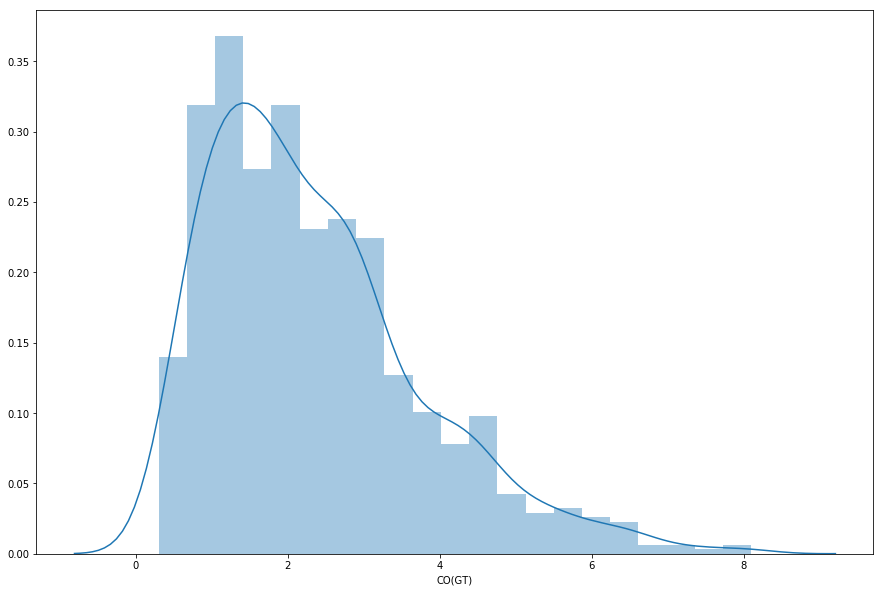

In [7]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(finalDataSet['CO(GT)'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
PT08.S1(CO),0.000920
NMHC(GT),0.001339
PT08.S2(NMHC),0.002999
NOx(GT),0.004666
PT08.S3(NOx),0.001148
NO2(GT),0.001710
T,-0.047431
RH,-0.011714
AH,0.654525


In [10]:
y_pred = regressor.predict(X_test)

In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,2.0,1.717426
1,3.1,3.088261
2,0.9,1.143854
3,2.4,2.435685
4,2.5,2.194276
5,0.9,0.764422
6,1.9,1.893969
7,5.7,5.070720
8,1.9,1.861977
9,4.1,4.539069


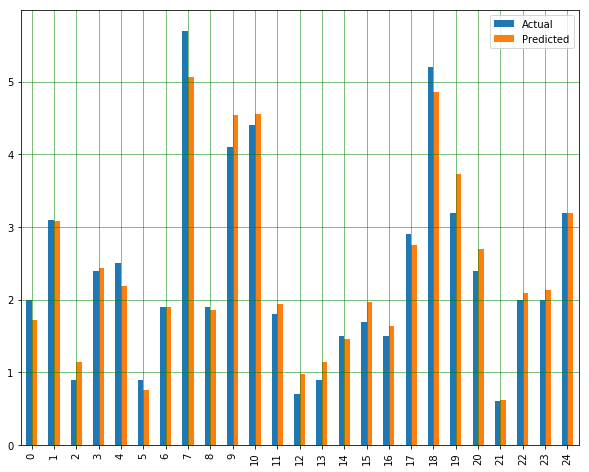

In [12]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.18783163995875177)
('Mean Squared Error:', 0.06684065546422502)
('Root Mean Squared Error:', 0.2585355980599674)


In [14]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))


0.9686577565059682


In [15]:
# Implementing another model which is the best to predict days are good for living.

In [38]:
X = finalDataSet[[ 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH','dayofweek','hour','month', 'day']]
y = finalDataSet['CO(GT)'].values
finalDataSet.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,AH,dayofweek,hour,month,day
0,2004-03-10,18:00:00,2.6,1360.00,150,1045.50,166.0,1056.25,113.0,13.60,48.875001,0.757754,2,0,3,10
1,2004-03-10,19:00:00,2.0,1292.25,112,954.75,103.0,1173.75,92.0,13.30,47.700000,0.725487,2,0,3,10
2,2004-03-10,20:00:00,2.2,1402.00,88,939.25,131.0,1140.00,114.0,11.90,53.975000,0.750239,2,0,3,10
3,2004-03-10,21:00:00,2.2,1375.50,80,948.25,172.0,1092.00,122.0,11.00,60.000000,0.786713,2,0,3,10
4,2004-03-10,22:00:00,1.6,1272.25,51,835.50,131.0,1205.00,116.0,11.15,59.575001,0.788794,2,0,3,10


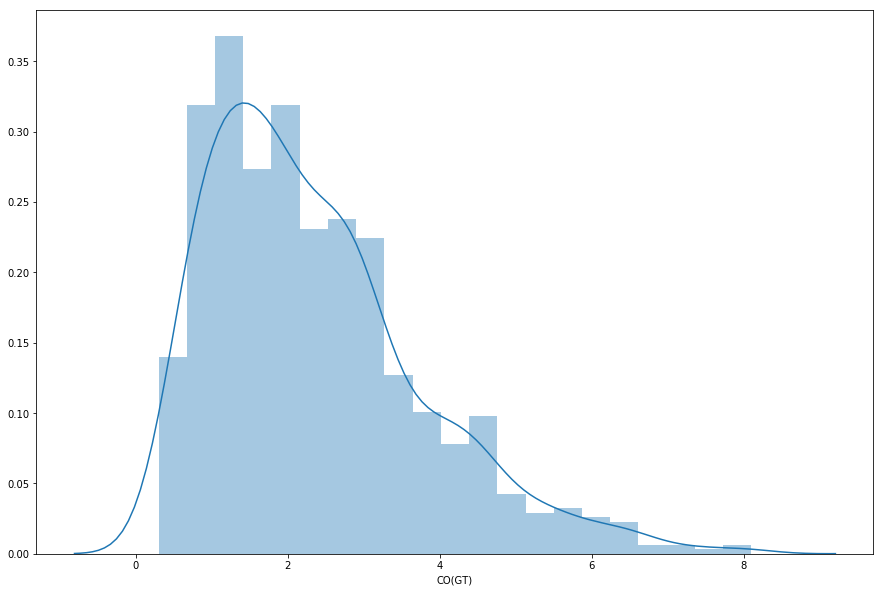

In [19]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(finalDataSet['CO(GT)'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1


,Actual,Predicted
0,2.0,2.100597
1,3.1,3.378139
2,0.9,0.539604
3,2.4,2.083603
4,2.5,2.485010
5,0.9,0.804258
6,1.9,2.070040
7,5.7,4.825812
8,1.9,2.094268
9,4.1,4.105743


In [39]:
print(' The Co-Efficients obtained are as follows :: ', coeff_df)
#print(' The Correlation obtained :: ', finalDataSet.corr())

(' The Co-Efficients obtained are as follows :: ',             Coefficient
NOx(GT)    1.388501e-02
NO2(GT)    6.627762e-03
T         -3.552464e-02
RH        -1.802497e-02
AH         1.095408e+00
dayofweek  9.570151e-03
hour       6.938894e-17
month      1.064444e-01
day        3.850905e-03)


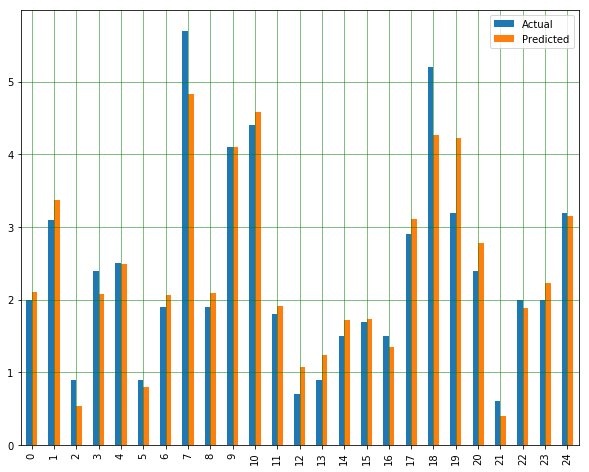

In [21]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

('Mean Absolute Error:', 0.303789041330613)
('Mean Squared Error:', 0.16406585765144469)
('Root Mean Squared Error:', 0.40505043840421245)
0.9230678989627656


## Implementation of Gradient Descent Algorithm

In [24]:
#Setting the matrices
my_data = finalDataSet
my_data = my_data.drop(['dayofweek', 'hour', 'month', 'day', 'Date', 'Time'], axis=1)
my_data.columns
#pd.show_versions(as_json=False)


Index([u'CO(GT)', u'PT08.S1(CO)', u'NMHC(GT)', u'PT08.S2(NMHC)', u'NOx(GT)',
       u'PT08.S3(NOx)', u'NO2(GT)', u'T', u'RH', u'AH'],
      dtype='object')

In [25]:
my_data = my_data.astype(float)
# We need to normalize the mean using mean normalization
my_data = (my_data - my_data.mean())/my_data.std()
my_data.head()
my_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,AH
count,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02
mean,7.387615e-16,3.754890e-16,1.261922e-17,5.145689e-16,-4.255631e-17,-6.308268e-16,2.629228e-16,-1.188892e-15,-4.634208e-16,7.486152e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.456951e+00,-1.882512e+00,-1.074659e+00,-1.946164e+00,-1.607018e+00,-1.887614e+00,-2.580188e+00,-1.932391e+00,-2.236822e+00,-2.406267e+00
25%,-7.474779e-01,-7.892710e-01,-7.388659e-01,-7.975724e-01,-7.638034e-01,-7.307204e-01,-6.909284e-01,-7.719027e-01,-8.089055e-01,-6.324783e-01
50%,-2.508465e-01,-1.477994e-01,-3.551027e-01,-8.157922e-02,-1.894399e-01,-1.623808e-01,-4.000708e-02,-1.191280e-01,3.277944e-02,-7.931204e-02
75%,5.295743e-01,7.133543e-01,4.196191e-01,6.620966e-01,5.315696e-01,6.311322e-01,6.902949e-01,5.699118e-01,7.516505e-01,5.359654e-01
max,4.076941e+00,3.440513e+00,4.595442e+00,2.958811e+00,4.087735e+00,3.652875e+00,3.039962e+00,2.984142e+00,2.238518e+00,3.660302e+00


In [26]:
X = my_data[[ 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']]
ones = np.ones([X.shape[0],1])
y = my_data['CO(GT)']

X = np.concatenate((ones,X), axis =1)
theta = np.array([0, 0, 0, 0, 0, 0])
# Set Hyper Parameter
alpha = 0.01
iters = 1000

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))


def gradientDescent(X, y, theta, alpha, numIterations):
    m = y.size  # number of training examples
    xTrans = X.transpose()
    cost_history = [0] * numIterations
    #print(xTrans)
    for i in range(0, numIterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        cost_history[i] = cost

        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta, cost_history

In [28]:
g, cost_history = gradientDescent(X, y, theta, alpha, iters)

Iteration 0 | Cost: 0.499395
Iteration 1 | Cost: 0.481169
Iteration 2 | Cost: 0.463718
Iteration 3 | Cost: 0.447010
Iteration 4 | Cost: 0.431012
Iteration 5 | Cost: 0.415693
Iteration 6 | Cost: 0.401023
Iteration 7 | Cost: 0.386974
Iteration 8 | Cost: 0.373520
Iteration 9 | Cost: 0.360634
Iteration 10 | Cost: 0.348292
Iteration 11 | Cost: 0.336469
Iteration 12 | Cost: 0.325145
Iteration 13 | Cost: 0.314296
Iteration 14 | Cost: 0.303902
Iteration 15 | Cost: 0.293944
Iteration 16 | Cost: 0.284403
Iteration 17 | Cost: 0.275261
Iteration 18 | Cost: 0.266500
Iteration 19 | Cost: 0.258104
Iteration 20 | Cost: 0.250058
Iteration 21 | Cost: 0.242345
Iteration 22 | Cost: 0.234953
Iteration 23 | Cost: 0.227867
Iteration 24 | Cost: 0.221074
Iteration 25 | Cost: 0.214561
Iteration 26 | Cost: 0.208316
Iteration 27 | Cost: 0.202329
Iteration 28 | Cost: 0.196587
Iteration 29 | Cost: 0.191080
Iteration 30 | Cost: 0.185799
Iteration 31 | Cost: 0.180734
Iteration 32 | Cost: 0.175875
Iteration 33 | Cost:

Iteration 287 | Cost: 0.047807
Iteration 288 | Cost: 0.047785
Iteration 289 | Cost: 0.047764
Iteration 290 | Cost: 0.047742
Iteration 291 | Cost: 0.047720
Iteration 292 | Cost: 0.047699
Iteration 293 | Cost: 0.047677
Iteration 294 | Cost: 0.047656
Iteration 295 | Cost: 0.047635
Iteration 296 | Cost: 0.047614
Iteration 297 | Cost: 0.047593
Iteration 298 | Cost: 0.047572
Iteration 299 | Cost: 0.047551
Iteration 300 | Cost: 0.047531
Iteration 301 | Cost: 0.047510
Iteration 302 | Cost: 0.047490
Iteration 303 | Cost: 0.047469
Iteration 304 | Cost: 0.047449
Iteration 305 | Cost: 0.047429
Iteration 306 | Cost: 0.047409
Iteration 307 | Cost: 0.047389
Iteration 308 | Cost: 0.047369
Iteration 309 | Cost: 0.047350
Iteration 310 | Cost: 0.047330
Iteration 311 | Cost: 0.047310
Iteration 312 | Cost: 0.047291
Iteration 313 | Cost: 0.047272
Iteration 314 | Cost: 0.047252
Iteration 315 | Cost: 0.047233
Iteration 316 | Cost: 0.047214
Iteration 317 | Cost: 0.047195
Iteration 318 | Cost: 0.047176
Iteratio

Iteration 601 | Cost: 0.043707
Iteration 602 | Cost: 0.043699
Iteration 603 | Cost: 0.043691
Iteration 604 | Cost: 0.043682
Iteration 605 | Cost: 0.043674
Iteration 606 | Cost: 0.043666
Iteration 607 | Cost: 0.043658
Iteration 608 | Cost: 0.043650
Iteration 609 | Cost: 0.043642
Iteration 610 | Cost: 0.043634
Iteration 611 | Cost: 0.043626
Iteration 612 | Cost: 0.043618
Iteration 613 | Cost: 0.043610
Iteration 614 | Cost: 0.043602
Iteration 615 | Cost: 0.043594
Iteration 616 | Cost: 0.043586
Iteration 617 | Cost: 0.043578
Iteration 618 | Cost: 0.043570
Iteration 619 | Cost: 0.043562
Iteration 620 | Cost: 0.043555
Iteration 621 | Cost: 0.043547
Iteration 622 | Cost: 0.043539
Iteration 623 | Cost: 0.043531
Iteration 624 | Cost: 0.043523
Iteration 625 | Cost: 0.043516
Iteration 626 | Cost: 0.043508
Iteration 627 | Cost: 0.043500
Iteration 628 | Cost: 0.043492
Iteration 629 | Cost: 0.043485
Iteration 630 | Cost: 0.043477
Iteration 631 | Cost: 0.043469
Iteration 632 | Cost: 0.043462
Iteratio

Iteration 884 | Cost: 0.042019
Iteration 885 | Cost: 0.042015
Iteration 886 | Cost: 0.042011
Iteration 887 | Cost: 0.042006
Iteration 888 | Cost: 0.042002
Iteration 889 | Cost: 0.041998
Iteration 890 | Cost: 0.041994
Iteration 891 | Cost: 0.041990
Iteration 892 | Cost: 0.041986
Iteration 893 | Cost: 0.041982
Iteration 894 | Cost: 0.041977
Iteration 895 | Cost: 0.041973
Iteration 896 | Cost: 0.041969
Iteration 897 | Cost: 0.041965
Iteration 898 | Cost: 0.041961
Iteration 899 | Cost: 0.041957
Iteration 900 | Cost: 0.041953
Iteration 901 | Cost: 0.041949
Iteration 902 | Cost: 0.041945
Iteration 903 | Cost: 0.041941
Iteration 904 | Cost: 0.041937
Iteration 905 | Cost: 0.041933
Iteration 906 | Cost: 0.041929
Iteration 907 | Cost: 0.041925
Iteration 908 | Cost: 0.041921
Iteration 909 | Cost: 0.041917
Iteration 910 | Cost: 0.041913
Iteration 911 | Cost: 0.041909
Iteration 912 | Cost: 0.041905
Iteration 913 | Cost: 0.041901
Iteration 914 | Cost: 0.041897
Iteration 915 | Cost: 0.041894
Iteratio

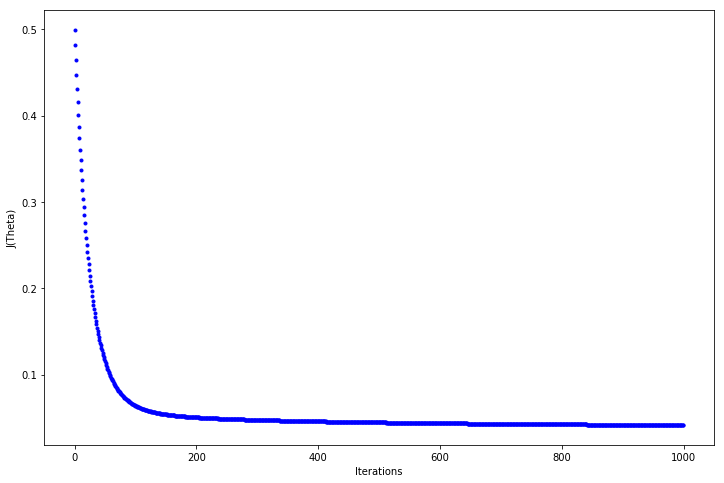

In [29]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iters),cost_history,'b.')

In [30]:
print(" Final Theta Values", g)

(' Final Theta Values', array([ 1.34726974e-16,  7.25858826e-01,  2.22217348e-01,  9.24152486e-03,
       -4.67816862e-02,  7.02580920e-02]))


# Implementation of Mini Batch Gradient Descent

In [44]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    xTrans = X.transpose()

    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        print(indices)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            #theta.reshape(-1,1)
            hypothesis = np.dot(X_i, theta)
            loss = hypothesis - y


            theta = theta -(1/m)*learning_rate*(xTrans.dot((loss)))
            cost_history[it]  = cost
        
    return theta, cost_history

In [45]:
theta = np.array([0, 0, 0, 0, 0, 0])


In [46]:
minibatch_gradient_descent(X,y,theta,0.01,10,20)

[312 508 717 786 269 805 256 594 646  95 751   4  71 343  79 436 557 272
 108 759 208  55 323 260 631 691 199 635 596 282 542 424 699  47 157  22
 460 177 669 516 344 584 116 405 152 394 213 452 683 616  10 768 241 656
 484 121 162  89 401  23 380 392 200 475 261 513 214 715 432 255 329 266
 308 576 274 593 363 578 245 642 400 120 645 450 356 151 479 201 763 347
 810  80 139  88 416 285 390 225 733  77 781 330 304 445  87  99 723 731
 413 811 776  37 180 337 276 570 607 533  43 327 565  49 406 511 301 341
 377 158 227 143 758 322 722 797 314 682 686 505 244 760 573 248 713  50
 628 534 428  61 700 675 626 757 464 819 655 179 378 232 483 612   3 532
 610 685 569 714 334 636 701 168 632  31 580 719 744 299 211 198 779 639
 659 765 745  93 546 247 315 490 698 539 724 613 233 278  13 653 808  21
 101 107 568 202 752 796 738 681 740 697 789  98 510 582 780 110 514 790
 716 364 332 204 633 231 469 791 735 237 496 138 222 661 567 410  46 787
 624 216 824 815 734 290 125 502 468 114 541 163 59

KeyError: u"None of [Int64Index([312, 508, 717, 786, 269, 805, 256, 594, 646,  95,\n            ...\n            617, 679, 295, 175, 144, 784, 270, 181, 620, 629],\n           dtype='int64', length=827)] are in the [columns]"

# Implementation of Stochastic Gradient Descent

In [34]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
       
    xTrans = X.transpose()
    
    cost_history = [0] * iterations

    for i in range(iterations):
         for i in range(m):
            #rand_ind = i;
            np.random.randint(0,m)
            X_i = X[rand_ind]
            y_i = y[rand_ind]
            print('X=',X_i, 'Y=',y_i)
            
            hypothesis = np.dot(X_i, theta)
            loss = hypothesis - y[rand_ind]
            # avg cost per example (the 2 in 2*m doesn't really matter here.
            # But to be consistent with the gradient, I include it)
            cost = np.sum(loss ** 2) / (2 * m)
            print("Iteration %d | Cost: %f" % (i, cost))
            cost_history[i] = cost
            #cost += cal_cost(theta,X_i,y_i)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((loss)))
        
    return theta, cost_history

In [35]:
lr =0.1
n_iter = 4

theta = np.array([0, 0, 0, 0, 0, 0])

theta,cost_history = stocashtic_gradient_descent(X,y,theta,lr,n_iter)


print('Theta ',theta)
print('Final cost/MSE:  {:0.3f}', cost_history)

('X=', array([ 1.        ,  0.27493907,  0.40452453, -0.41443091, -0.01143353,
       -0.41509466]), 'Y=', 0.17483758670804128)
Iteration 0 | Cost: 0.000018
('X=', array([ 1.        , -0.49495239, -0.26227288, -0.47659992, -0.08839702,
       -0.59585218]), 'Y=', -0.25084646885883666)
Iteration 1 | Cost: 0.000038
('X=', array([ 1.        , -0.15277841,  0.43627679, -0.76672198,  0.32262039,
       -0.45719263]), 'Y=', -0.10895178366987723)
Iteration 2 | Cost: 0.000007
('X=', array([ 1.        ,  0.34826206,  0.69029486, -0.95322905,  0.71726254,
       -0.25286682]), 'Y=', -0.10895178366987723)
Iteration 3 | Cost: 0.000007
('Theta ', array([0., 0., 0., 0., 0., 0.]))
('Final cost/MSE:  {:0.3f}', [1.848136742798782e-05, 3.80435011722777e-05, 7.176838672822085e-06, 7.176838672822085e-06])
